In [1]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
predicted_validation = pd.read_csv('../backend/src/resources/data/validation_hidden_scoring_results.csv')
predicted_test = pd.read_csv('../backend/src/resources/data/test_hidden_scoring_results.csv')
truth = pd.read_csv('../backend/src/resources/data/train.csv')

In [3]:
predicted_test["label"] = predicted_test["score"].apply(lambda score: True if score > .5 else False)
predicted_validation["label"] = predicted_validation["score"].apply(lambda score: True if score > .5 else False)

predicted_test["label"].to_csv("test_results.csv", index=False, header=False)
predicted_validation["label"].to_csv("validation_results.csv", index=False, header=False)

In [4]:
y_true = truth['label']
y_pred = predicted['score'].apply(lambda score: True if score > .5
 else False)

print(f"Accuracy --> {accuracy_score(y_true, y_pred)}")
print(f"Precision --> {precision_score(y_true, y_pred)}")
print(f"Recall --> {recall_score(y_true, y_pred)}")

Accuracy --> 0.767686904164576
Precision --> 0.9014192558496356
Recall --> 0.5956907477820025


In [5]:
distinct = predicted[((y_true != y_pred) & (y_true == True))]
distinct

,Unnamed: 0,key1,key2,score
7,7,conf/eh/zhaojzw05,journals/mj/caocrjzlsz09,0.536873
10,10,conf/mmb/sassj06,conf/kivs/sass03,0.292143
12,12,conf/nems/raolw09,conf/cars/fujdcwlglzdmlhpgclwcx03,0.462970
22,22,conf/icse/ferrariblgfcltssrmbm10,conf/ictai/araujoos09,0.293125
23,23,conf/mfcs/boerrh99,journals/scp/roever10,0.309771
...,...,...,...,...
7931,7931,conf/gvd/albrecht93,books/infix/klettke98,0.408214
7934,7934,journals/orl/baki06,journals/cor/bakik99,0.380128
7936,7936,conf/colcom/zhangj07,journals/tkde/shafiqjbg05,0.387631
7943,7943,journals/ijprai/leungc07,journals/nca/leungl07,0.438854


<AxesSubplot: xlabel='score', ylabel='Count'>

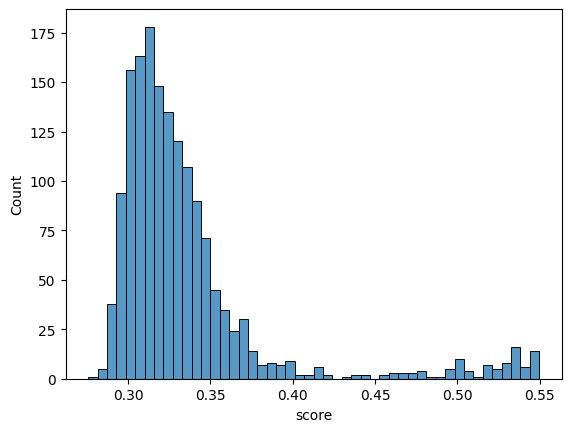

In [6]:
sns.histplot(distinct["score"])

In [7]:
collection = pd.read_csv('../backend/src/resources/data/collection.csv').set_index('pkey')
collection

,Unnamed: 0,pid,pauthor,peditor,ptitle,pyear,paddress,ppublisher,pseries,pjournal,pbooktitle,ptype
pkey,,,,,,,,,,,,
conf/dft/semiaorvstt07,0,180843,fabian vargas|isabel c teixeira|joo paulo teix...,NaN,improving the tolerance of pipeline based circ...,2007,NaN,NaN,NaN,NaN,nn,inproceedings
conf/dagstuhl/caire07,1,162991,patrice caire,NaN,a normative multiagent systems approach to the...,2007,NaN,NaN,NaN,NaN,rpn grid cnfrnc,inproceedings
journals/tit/bt07,2,2261406,andrew thangaraj|sundeep b,NaN,selforthogonality of qary images of qmary code...,2007,NaN,NaN,NaN,international journal of ambient computing and...,acm symposium on parallel algorithms and archi...,article
conf/icdcsw/pardo-castellote03,3,349720,gerardo pardocastellote,NaN,omg datadistribution service architectural ove...,2003,NaN,NaN,NaN,NaN,international agent technology conference,inproceedings
journals/corr/abs-0911-4329,4,1922328,kihoon lee|kyuyoung whang|minsoo kim |wookshin...,NaN,structural consistency enabling xml keyword se...,2009,NaN,NaN,NaN,international journal of wireless information ...,messung,article
...,...,...,...,...,...,...,...,...,...,...,...,...
journals/ijlt/sgouropoulouk05,17160,2345485,anastasios koutoumanos|cleo sgouropoulou,NaN,applying metadata standards to multilingual le...,2005,NaN,NaN,NaN,NaN,NaN,article
journals/sigir/denoyerg06,17161,2208861,ludovic denoyer|patrick gallinari,NaN,the wikipedia xml corpus,2006,NaN,NaN,NaN,NaN,NaN,article
journals/ijprai/felfernigtg07,17162,2039884,alexander felfernig|bartosz gula|erich teppan,NaN,knowledgebased recommender technologies for ma...,2007,NaN,NaN,NaN,NaN,NaN,article


In [19]:
distinct = predicted[((y_true != y_pred) & (y_true == True))]

def distinct_feature(key1, key2, feature_name):
    feat1 = collection.loc[key1][feature_name]
    feat2 = collection.loc[key2][feature_name]

    return (feat1, feat2)

x = distinct.merge(collection, left_on='key1', right_on='pkey').merge(collection, left_on='key2', right_on='pkey')
x[['key1', 'key2', 'ptitle_x', 'ptitle_y']].head(50)

,key1,key2,ptitle_x,ptitle_y
0,conf/eh/zhaojzw05,journals/mj/caocrjzlsz09,evolutionary design of analog circuits with a ...,measurement of secondorder nonlinear optical s...
1,conf/mmb/sassj06,conf/kivs/sass03,imp an architecture for hardwaresupported hig...,fluidflowanstze zur analytischen untersuchung ...
2,conf/nems/raolw09,conf/cars/fujdcwlglzdmlhpgclwcx03,synthesis of horizontally aligned singlewalled...,picture archiving and communication system in ...
3,conf/icse/ferrariblgfcltssrmbm10,conf/ictai/araujoos09,an exploratory study of faultproneness in evol...,a morphologicalranklinear approach for softwar...
4,conf/mfcs/boerrh99,journals/scp/roever10,the semantic foundations of a compositional pr...,remembering amir pnueli a great scientist and ...
5,conf/fossacs/abraham-mummbrs02,journals/scp/roever10,verification for javas reentrant multithreadin...,remembering amir pnueli a great scientist and ...
6,conf/iat/silaghi06,conf/aaai/matsuimshy08,framework for modeling reordering heuristics f...,resource constrained distributed constraint op...
7,journals/tvlsi/moonasdb03,conf/glvlsi/bhattidd06,voltagepulse driven harmonic resonant rail dri...,gbps serdes design based on ibm cu nm standar...
8,journals/ijaci/montoroha10,conf/ecai/alamanapz92,a dynamic spoken dialogue interface for ambien...,the maquettebased methodology applied to realt...
9,conf/appinf/jimenezscrc94,conf/nips/serrano-gotarredonaollpgrdlzwdhjcsal05,applications to embedded controllers a general...,aer building blocks for multilayer multichip n...


,Unnamed: 0_x,key1,key2,score,Unnamed: 0_y,pid_x,pauthor_x,peditor_x,ptitle_x,pyear_x,...,pauthor_y,peditor_y,ptitle_y,pyear_y,paddress_y,ppublisher_y,pseries_y,pjournal_y,pbooktitle_y,ptype_y
0,7,conf/eh/zhaojzw05,journals/mj/caocrjzlsz09,0.536873,8391,210834,jianxun zhao|licheng jiao|shuguang zhao|yuping...,NaN,evolutionary design of analog circuits with a ...,2005,...,bao shi|ce ren|gang jia|jianxun zhao|kun cao|t...,NaN,measurement of secondorder nonlinear optical s...,2009,NaN,NaN,NaN,NaN,messung,article
1,10,conf/mmb/sassj06,conf/kivs/sass03,0.292143,12604,591877,detlef sass|sascha junghans,NaN,imp an architecture for hardwaresupported hig...,2006,...,detlef sa,NaN,fluidflowanstze zur analytischen untersuchung ...,2003,NaN,NaN,NaN,NaN,NaN,inproceedings
2,12,conf/nems/raolw09,conf/cars/fujdcwlglzdmlhpgclwcx03,0.462970,4189,910614,fubo rao|tie li|yuelin wang,NaN,synthesis of horizontally aligned singlewalled...,2009,...,baoluo li|cheng zhou|chunhua chai|haihong fu|j...,NaN,picture archiving and communication system in ...,2003,NaN,NaN,NaN,NaN,messung,inproceedings
3,22,conf/icse/ferrariblgfcltssrmbm10,conf/ictai/araujoos09,0.293125,4191,429435,alessandro garcia|awais rashid|eduardo figueir...,NaN,an exploratory study of faultproneness in evol...,2010,...,adriano l i de oliveira|ricardo de a arajo|srg...,NaN,a morphologicalranklinear approach for softwar...,2009,NaN,NaN,NaN,NaN,messung,inproceedings
4,23,conf/mfcs/boerrh99,journals/scp/roever10,0.309771,12607,578457,frank s de boer|ulrich hannemann|willem p de r...,NaN,the semantic foundations of a compositional pr...,1999,...,willempaul de roever,NaN,remembering amir pnueli a great scientist and ...,2010,NaN,NaN,NaN,NaN,messung,inproceedings
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1590,7947,conf/gecco/millerh10,journals/gpem/hardingmb10,0.396545,15936,267343,julian francis miller|simon l harding,NaN,cartesian genetic programming,2010,...,julian f miller|simon harding|wolfgang banzhaf,NaN,developments in cartesian genetic programming ...,2010,NaN,NaN,NaN,NaN,messung,article
1591,7911,conf/ecai/ternovskaia00,conf/kr/deneckert04,0.369133,7838,195094,eugenia ternovskaia,NaN,idlogic and the ramification problem for the s...,2000,...,eugenia ternovska|marc denecker,NaN,inductive situation calculus,2004,NaN,NaN,NaN,NaN,NaN,inproceedings
1592,7913,journals/aes/damaj06,reference/wiley/damaj08a,0.354744,3168,2341504,issam damaj,NaN,parallel algorithms development for programmab...,2006,...,issam w damaj,NaN,programmable logic arrays,2008,NaN,NaN,NaN,NaN,NaN,incollection
1593,7934,journals/orl/baki06,journals/cor/bakik99,0.380128,15580,2169563,mohammed fazle baki,NaN,a new asymmetric pyramidally solvable class of...,2006,...,md fazle baki|santosh n kabadi,NaN,pyramidal traveling salesman problem,1999,NaN,NaN,NaN,innovations in systems and software engineering,messung,article


In [9]:
distinct[["distinct_ptype", "distinct_peditor", "distinct_ptitle", "distinct_pyear", "distinct_pjournal", "distinct_pauthor"]].mean()

KeyError: "None of [Index(['distinct_ptype', 'distinct_peditor', 'distinct_ptitle',\n       'distinct_pyear', 'distinct_pjournal', 'distinct_pauthor'],\n      dtype='object')] are in the [columns]"

In [ ]:
equals = predicted[((y_true == y_pred) & (y_true == True))]

def distinct_feature(key1, key2, feature_name):
    feat1 = collection.loc[key1][feature_name]
    feat2 = collection.loc[key2][feature_name]

    return feat1 != feat2

equals['equals_ptype'] = equals.apply(lambda df: distinct_feature(df.key1, df.key2, "ptype"), axis=1)
equals['equals_peditor'] = equals.apply(lambda df: distinct_feature(df.key1, df.key2, "peditor"), axis=1)
equals['equals_ptitle'] = equals.apply(lambda df: distinct_feature(df.key1, df.key2, "ptitle"), axis=1)
equals['equals_pyear'] = equals.apply(lambda df: distinct_feature(df.key1, df.key2, "pyear"), axis=1)
equals['equals_pjournal'] = equals.apply(lambda df: distinct_feature(df.key1, df.key2, "pjournal"), axis=1)
equals['equals_pauthor'] = equals.apply(lambda df: distinct_feature(df.key1, df.key2, "pauthor"), axis=1)

equals[["equals_ptype", "equals_peditor", "equals_ptitle", "equals_pyear", "equals_pjournal", "equals_pauthor"]].mean()

equals_ptype       0.231501
equals_peditor     1.000000
equals_ptitle      0.991319
equals_pyear       0.847044
equals_pjournal    0.964862
equals_pauthor     0.870608
dtype: float64

In [9]:
%pip install ijson

     ---------------------------------------- 0.0/48.2 kB ? eta -:--:--
     ---------------------------------------- 48.2/48.2 kB ? eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [10]:
import json

In [8]:
with open('../../arxiv-metadata-oai-snapshot.json', 'r') as f:
    for line in f:
        data = json.loads(line)
        print(data)
        break
        # data[u'name'], data[u'engine_speed'], data[u'timestamp'] now
        # contain correspoding values

JSONDecodeError: Extra data: line 2 column 1 (char 1689)